Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-3-6660a8f4ffcd>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


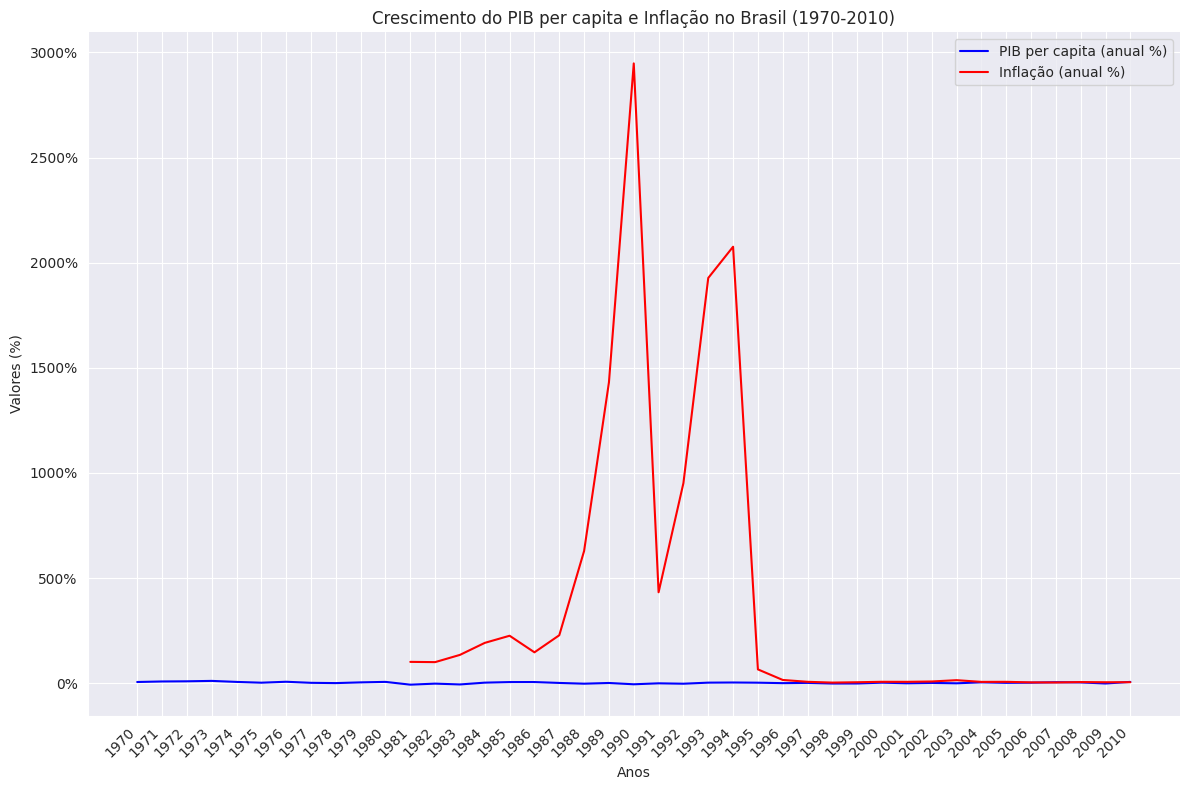

In [3]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def montar_diretorio():
    drive.mount('/content/gdrive')

def carregar_dados(caminho, conjunto_de_dados):
    try:
        df = pd.read_csv(caminho + conjunto_de_dados, sep=';', decimal=',')
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Arquivo não encontrado na pasta. {caminho + conjunto_de_dados}")

def analisar_dados(df, indicador, codigo_do_pais, anos):
    colunas = ['Country Code'] + anos
    dados_filtrados = df[df['Indicator Name'].str.contains(indicador)][colunas]
    dados_filtrados = dados_filtrados[dados_filtrados['Country Code'] == codigo_do_pais]

    if dados_filtrados.empty:
        raise ValueError("Nenhum dado encontrado para os critérios especificados.")

    return dados_filtrados[anos]

def plotar_grafico(dados1, dados2, rotulo1, rotulo2, anos):
    plt.figure(figsize=(12, 8))
    sns.set_style("darkgrid")
    plt.plot(anos, dados1.values[0], label=rotulo1, linestyle='-', color='blue')  # Linha contínua vermelha para o PIB per capita
    plt.plot(anos, dados2.values[0], label=rotulo2, linestyle='-', color='red')   # Linha contínua rosa para a inflação
    plt.xlabel('Anos')
    plt.ylabel('Valores (%)')
    plt.title('Crescimento do PIB per capita e Inflação no Brasil (1970-2010)')
    plt.legend()
    plt.xticks(rotation=45, ha="right")
    plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])
    plt.tight_layout()
    sns.despine()
    plt.show()


# Configurações
caminho = '/content/gdrive/MyDrive/'
conjunto_de_dados = 'wdi_paises_america_sul_series_validas.csv'
anos = [str(ano) for ano in range(1970, 2011)]

# Montar o Google Drive
montar_diretorio()

# Carregar o conjunto de dados
df = carregar_dados(caminho, conjunto_de_dados)

# Analisar os dados para o crescimento do PIB per capita e a inflação no Brasil
try:
    dados_pib = analisar_dados(df, 'GDP per capita growth', 'BRA', anos)
    dados_inflacao = analisar_dados(df, 'Inflation, consumer prices', 'BRA', anos)

    # Plotar o gráfico de correlação
    plotar_grafico(dados_pib, dados_inflacao, 'PIB per capita (anual %)', 'Inflação (anual %)', anos)

except FileNotFoundError as e:
    print(f"Erro: {e}")
except ValueError as e:
    print(f"Erro: {e}")
